<a href="https://colab.research.google.com/github/TheoLequy/HappinessHackers/blob/main/Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# XGBoost is typically the best for a lot of this kind of stuff (https://dataaspirant.com/xgboost-algorithm/)
# google xgboost kaggle and youll see what i mean
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

# Rest of everything we use will probably be sklearn cause its the easiest to use
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [ ]:
# Clone the github repo with all the data
%cd /content

!git clone https://github.com/TheoLequy/HappinessHackers.git

# Change to this directory
%cd HappinessHackers

# List the files
#!ls
df = pd.read_csv("final_dataset_raw.csv")
df.head()

In [ ]:
def plot_per_year(year, crit):
  plot = df[["code", "happiness", "year", crit]]
  xy = plot[plot["year"] == year]
  score = xy[["happiness"]]
  y = xy[[crit]]
  code = xy[["code"]]

  plt.figure()
  plt.scatter(y, score)

  #for i, txt in enumerate(code):
        #plt.annotate(txt, (score[i], y[i]))

  plt.xlabel('Happiness Score')
  plt.ylabel(crit)
  plt.title(crit + " " + str(year))

#plot_per_year(2019, 'indiv_free')

In [ ]:
"""country = data['Country']
    score = data['Happiness Score']
    y = data[col]
    plt.figure()
    plt.scatter(score, y)

    for i, txt in enumerate(country):
        plt.annotate(txt, (score[i], y[i]))

    plt.xlabel('Happiness Score')
    plt.ylabel(col)
    plt.title(col)"""

#Plot per Feature

In [ ]:
def linear(x, score):
  model = LinearRegression()
  model.fit(x, score)
  Y = model.predict(x)
  return Y

In [ ]:
def plot_per(crit):
  plot = df[["code", "happiness", "year", crit]]
  xy = plot.dropna()
  score = xy[["happiness"]]
  x = xy[[crit]]
  code = xy[["code"]]
  Y = linear(x, score)

  plt.figure()
  plt.scatter(x, score)
  plt.plot(x,Y, c='r')
  plt.ylabel('Happiness Score')
  plt.xlabel(crit)
  plt.title(crit)
#plot_per('indiv_libs')
#plot_per('food_insec')
#plot_per('life_expectancy')
#plot_per('hri')
#plot_per('suicides')
#plot_per('covid')

In [ ]:
years = df['year'].unique()
column_labels = df.columns
list(column_labels)

temp = df[['code','year', 'yearly temp']]
temp = temp.dropna()
temp.max()

In [ ]:
def plot_per_feature(df, feature):
  data = df[['happiness','year', feature]]
  data = data.dropna()
  years = data['year'].unique()

  score = data[["happiness"]]
  X = data[[feature]]
  #code = xy[["code"]]
  Y = linear(X, score)

  plt.figure()
  for year in (years):
    c = data[data['year'] == year]
    x = c[feature]
    y = c['happiness']
    plt.scatter(x, y, label = year)
  plt.plot(X,Y, c='r', label = 'linear regression')
  plt.ylabel('Happiness Score')
  plt.xlabel(feature)
  plt.title(feature)
  plt.legend()

plot_per_feature(df, 'indiv_libs')

In [ ]:
def plot_feature_vs_happiness_grouped_by_year_with_regression(df, feature):
    """
    Given a DataFrame with 'country', 'year', 'happiness', and one other feature,
    this function plots the feature against 'happiness' over all countries and all years,
    coloring the data points by year, and fits a linear regression line through all the data.

    :param df: pandas DataFrame with 'country', 'year', 'happiness', and other features
    :param feature: The name of the feature to plot against 'happiness'
    """
    data = df[['happiness','year', feature]]
    data = data.dropna()

    # Initialize a linear regression model
    model = LinearRegression()

    # Set up the plot
    plt.figure(figsize=(10, 6))

    # Group the data by 'year'
    grouped = data.groupby('year')

    # Assign unique colors to each group
    colors = plt.cm.viridis(np.linspace(0, 1, len(grouped)))  # Viridis colormap for distinct colors

    # Plot each group separately
    for (year, group), color in zip(grouped, colors):
        plt.scatter(
            group[feature],
            group['happiness'],
            color=color,
            label=f'Year {year}'
        )

    # Fit a linear regression model over all data
    X = data[[feature]]  # 'feature' must be in 2D for sklearn
    y = data['happiness']
    model.fit(X, y)

    # Generate predictions for the regression line
    x_range = np.linspace(df[feature].min(), df[feature].max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)

    # Plot the regression line
    plt.plot(x_range, y_pred, color='red', linestyle='-', label='Regression Line')

    # Customize the plot
    plt.xlabel(feature.capitalize())
    plt.ylabel("Happiness")
    plt.title(f"Happiness vs. {feature.capitalize()}")
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()


#plot_feature_vs_happiness_grouped_by_year_with_regression(df, 'indiv_libs')
def plot_all_features(df):
  features = list(df.columns )[3:]
  for f in features:
    plot_feature_vs_happiness_grouped_by_year_with_regression(df, f)
plot_all_features(df)

# Plots over years

In [ ]:
def plot_feature_against_year(df, feature_col):
    # Create a new plot
    plt.figure(figsize=(8, 5))

    # Plot the specified feature against 'year'
    plt.scatter(df['year'], df[feature_col], label=feature_col)

    # Set plot labels and title
    plt.xlabel('Year')
    plt.ylabel(feature_col)

    plt.title(f"{feature_col} Over the Years")

    # Show the plot with a grid and legend
    plt.grid(True)
    plt.legend()

    # Display the plot
    plt.show()

In [ ]:
def plot_dual_axis(df, feature_col):
    df = df[['happiness', 'year',feature_col]]
    df = df.dropna()
    # Create a new figure and primary axis
    fig, ax1 = plt.subplots()

    # Plot 'happiness' on the left y-axis
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Happiness', color='tab:blue')  # Color for the left y-axis
    ax1.scatter(df['year'], df['happiness'], c='tab:blue', label='Happiness')
    ax1.tick_params(axis='y', labelcolor='tab:blue')  # Color the left y-axis ticks

    # Create a secondary axis for the other feature
    ax2 = ax1.twinx()  # Share the same x-axis
    ax2.set_ylabel(feature_col, color='tab:red')  # Color for the right y-axis
    ax2.scatter(df['year'], df[feature_col], c='tab:red', label=feature_col)
    ax2.tick_params(axis='y', labelcolor='tab:red')  # Color the right y-axis ticks

    # Add legends and titles for clarity
    fig.tight_layout()  # To prevent label overlap
    plt.title('Dual Axis Plot of Happiness and ' + feature_col)

    # Display the plot
    plt.show()


#Special Plots per feature

<ipython-input-32-0d7568dc3c63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['happiness'] = covid['happiness'] - covid.groupby('code')['happiness'].transform('mean')


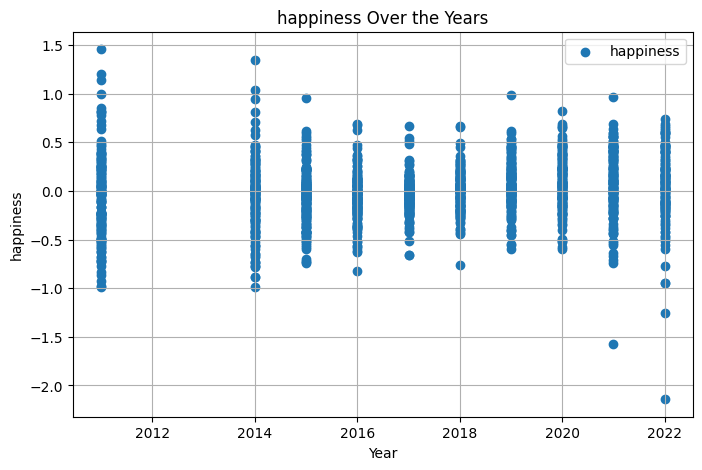

In [ ]:
# for covid take - mean
covid = df[['code', 'year', 'happiness', 'covid']]
covid['happiness'] = covid['happiness'] - covid.groupby('code')['happiness'].transform('mean')
#plot_feature_vs_happiness_grouped_by_year_with_regression(covid, 'covid')
#plot_dual_axis(covid, 'covid')
plot_feature_against_year(covid, 'happiness')

#Plot per most variing feature

In [ ]:
def feature_max_time(df, feature):
    """
    Given a DataFrame with 'country', 'year', 'happiness', and other features,
    this function finds the country for which the specified feature varies the most
    over the years and plots 'happiness' for this country over the years.

    :param df: pandas DataFrame with 'country', 'year', 'happiness', and other features
    :param feature: The name of the feature to analyze for variance
    """
    # Group by country
    grouped = df.groupby('code')

    # Calculate variance for the specified feature in each group
    variances = grouped[feature].var()

    # Find the country with the highest variance
    most_varying_country = variances.idxmax()
    print(most_varying_country)

    # Filter data for this country
    country_data = df[df['code'] == most_varying_country]

    # Plot 'happiness' over the years for this country
    plt.figure(figsize=(10,7))
    ax1 = plt.subplot(121)
    ax1.plot(country_data['year'], country_data['happiness'], marker='o', linestyle='-', color='b', label='Happiness')
    plt.xlabel('Year')
    plt.ylabel('Happiness')
    plt.title('Happiness over Years for {} variing the most concerning {}'.format(most_varying_country, feature))
    plt.grid(True)

    ax2 = plt.subplot(122)
    ax2.plot(country_data['year'], country_data[feature], marker='o', linestyle='-', color='b', label=feature)
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.title('{} over Years for {}'.format(feature, most_varying_country))
    plt.legend()
    plt.show()
def plot_all_features_max(df):
  features = list(df.columns )[3:]
  for f in features:
    feature_max_time(df, f)
plot_all_features_max(df)

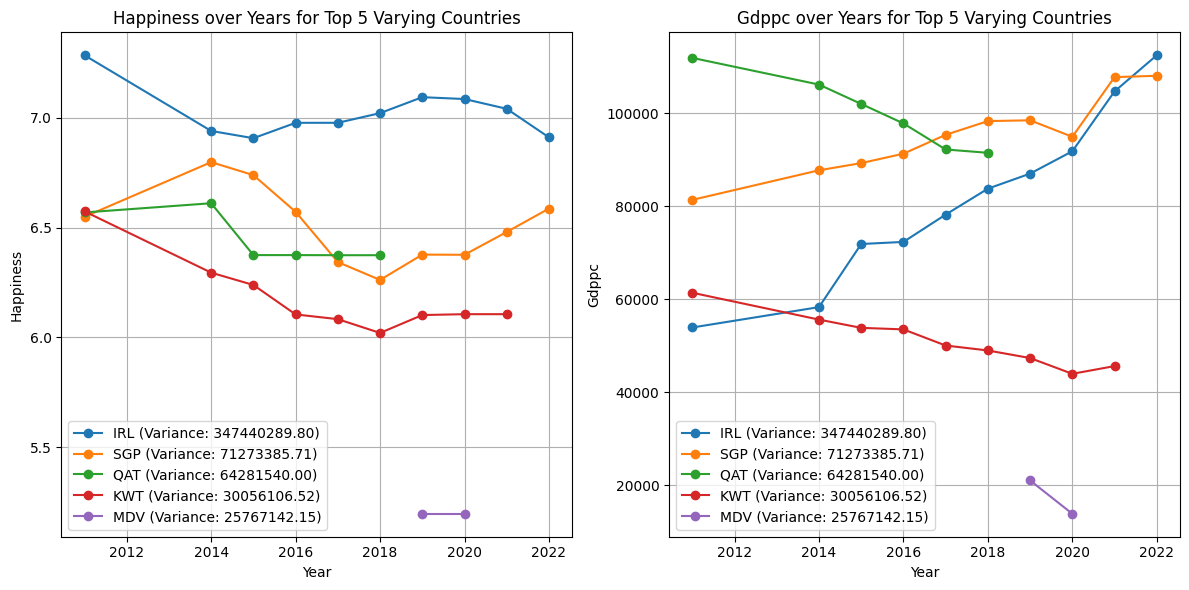

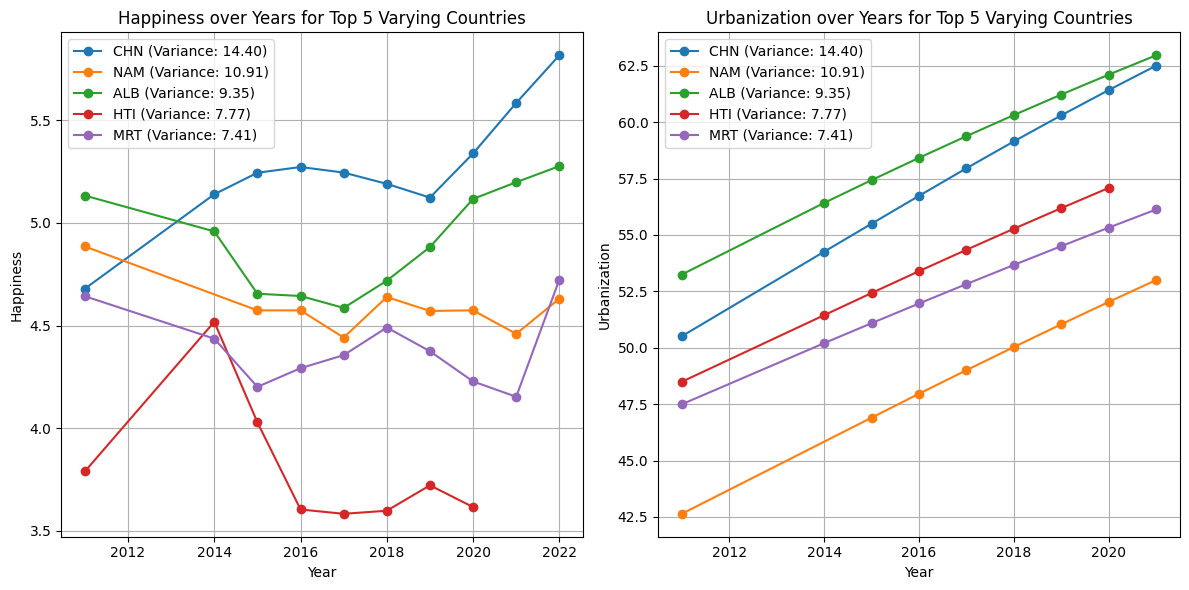

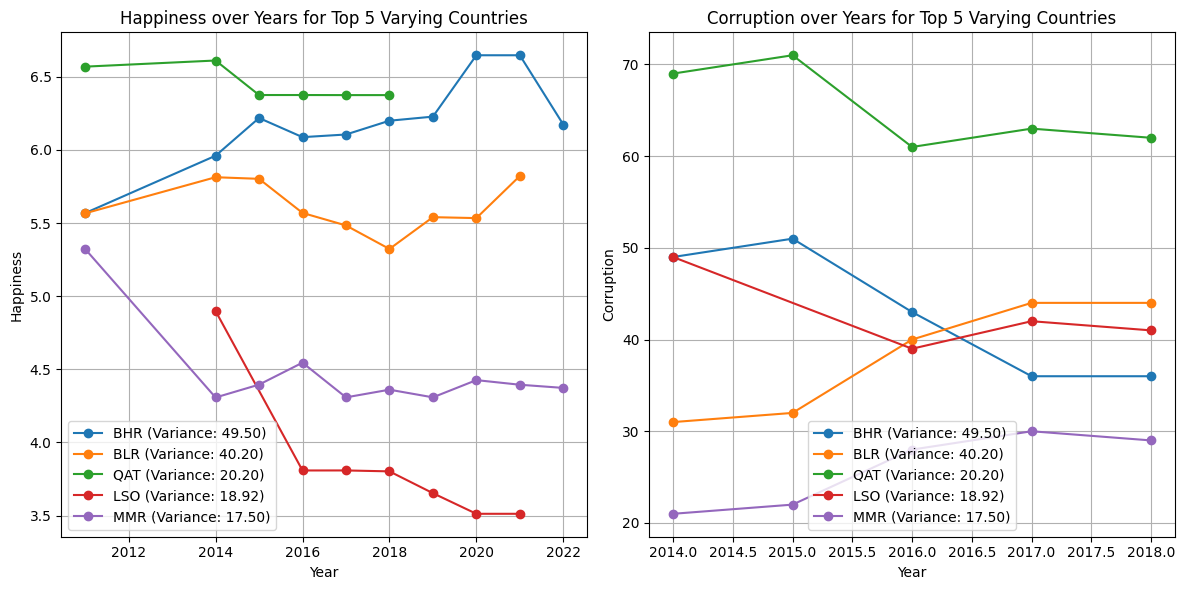

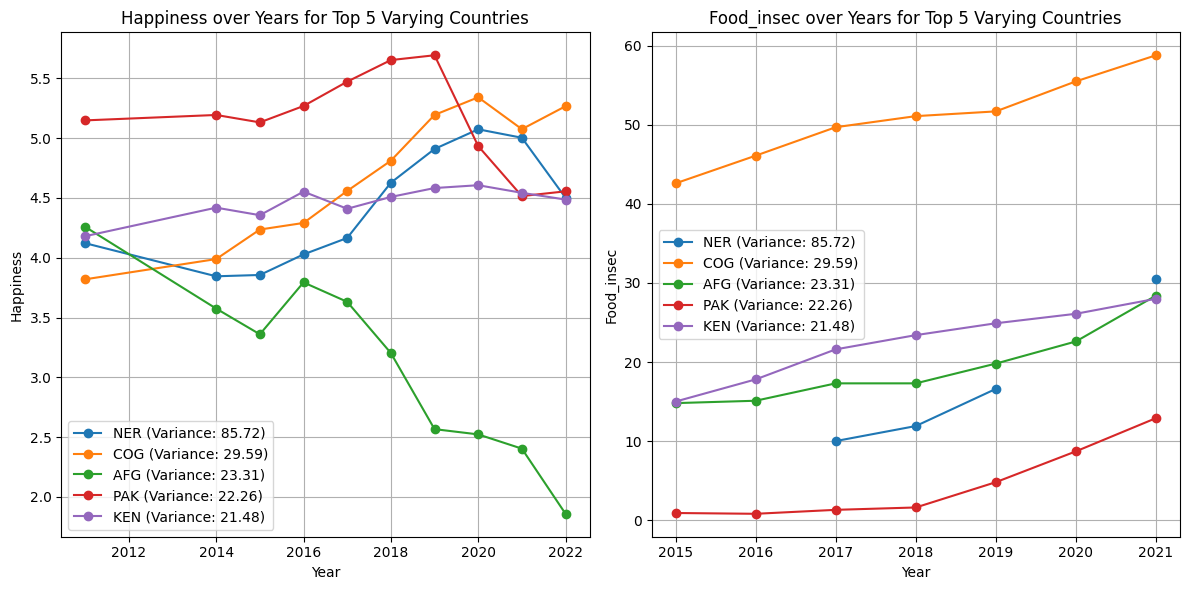

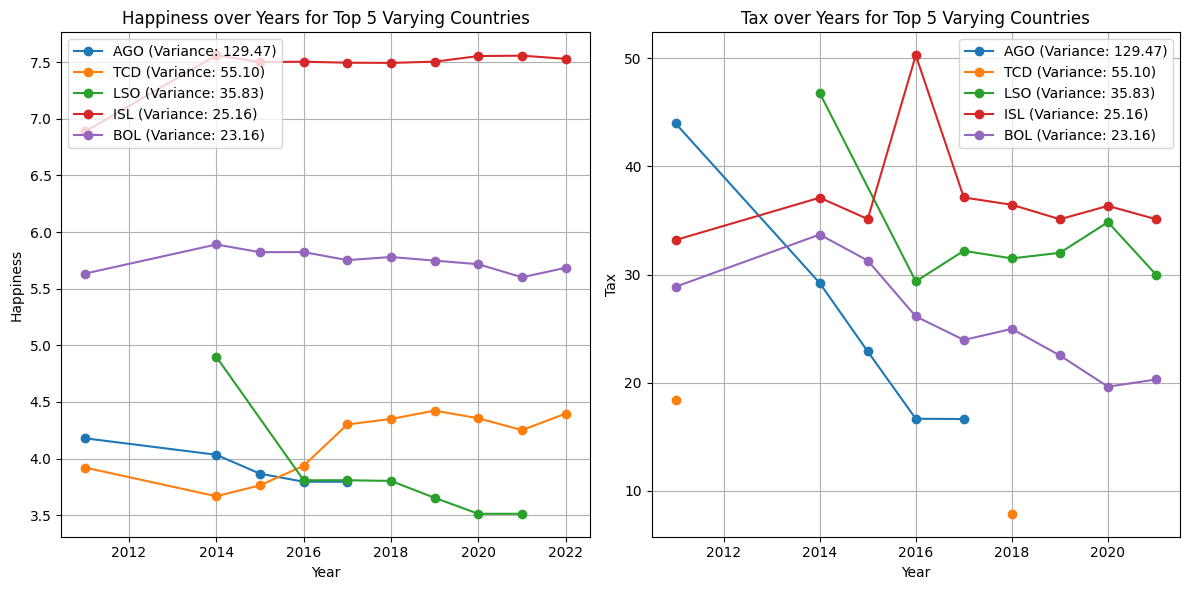

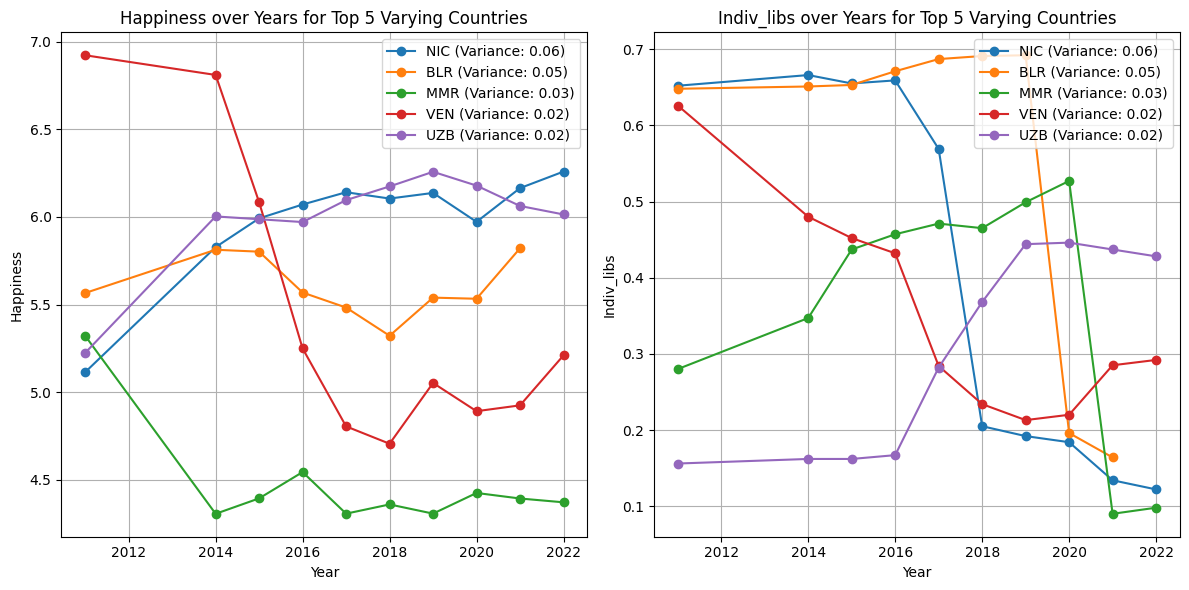

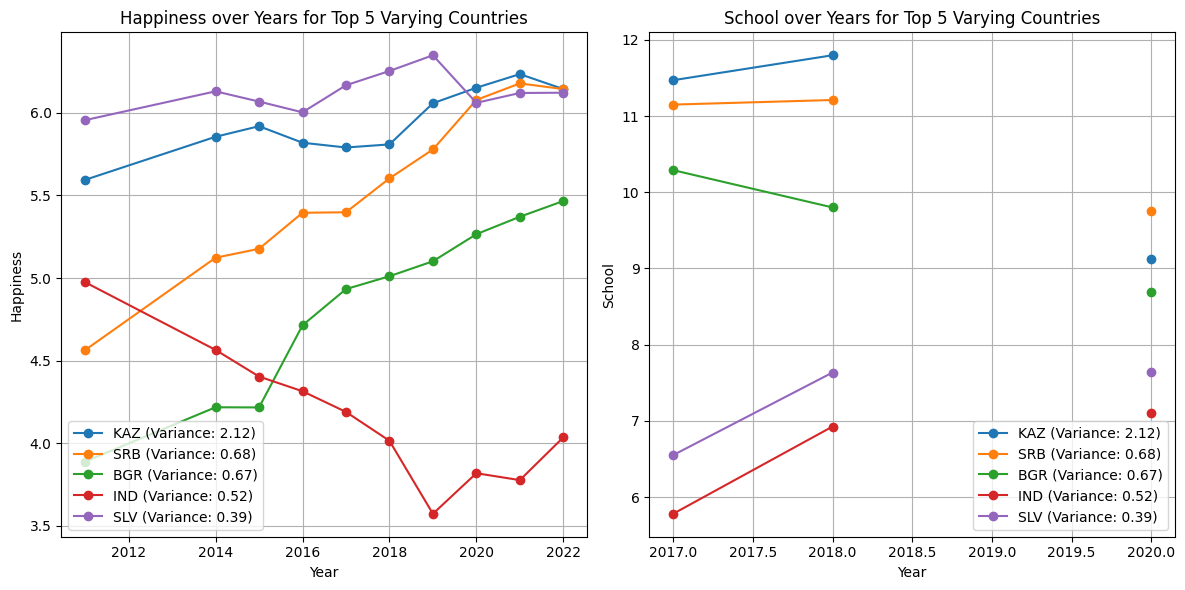

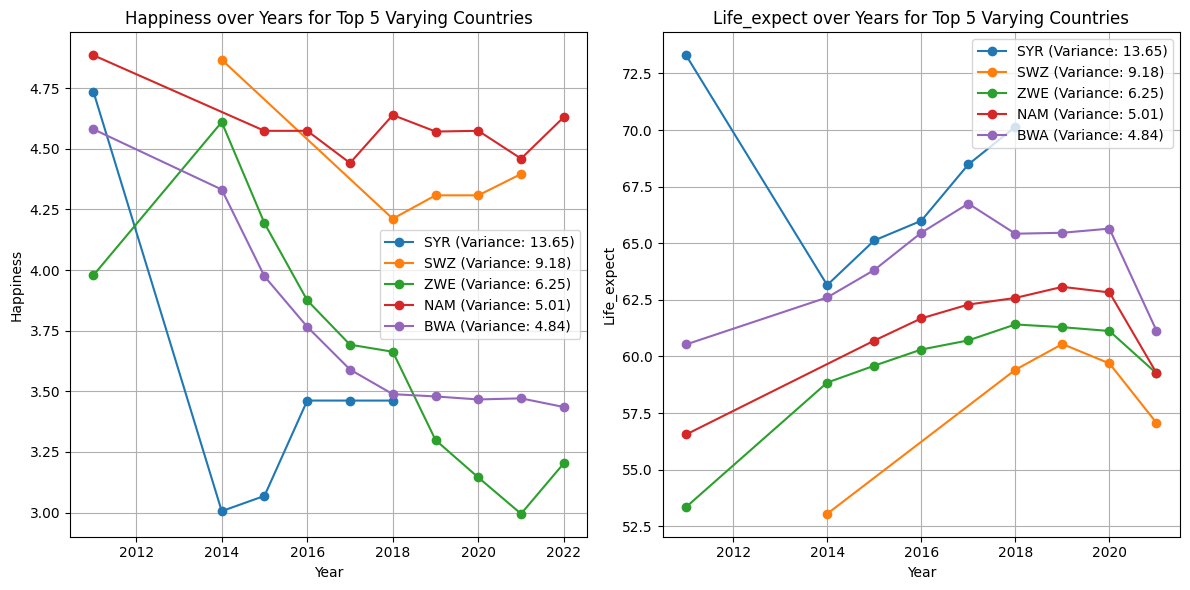

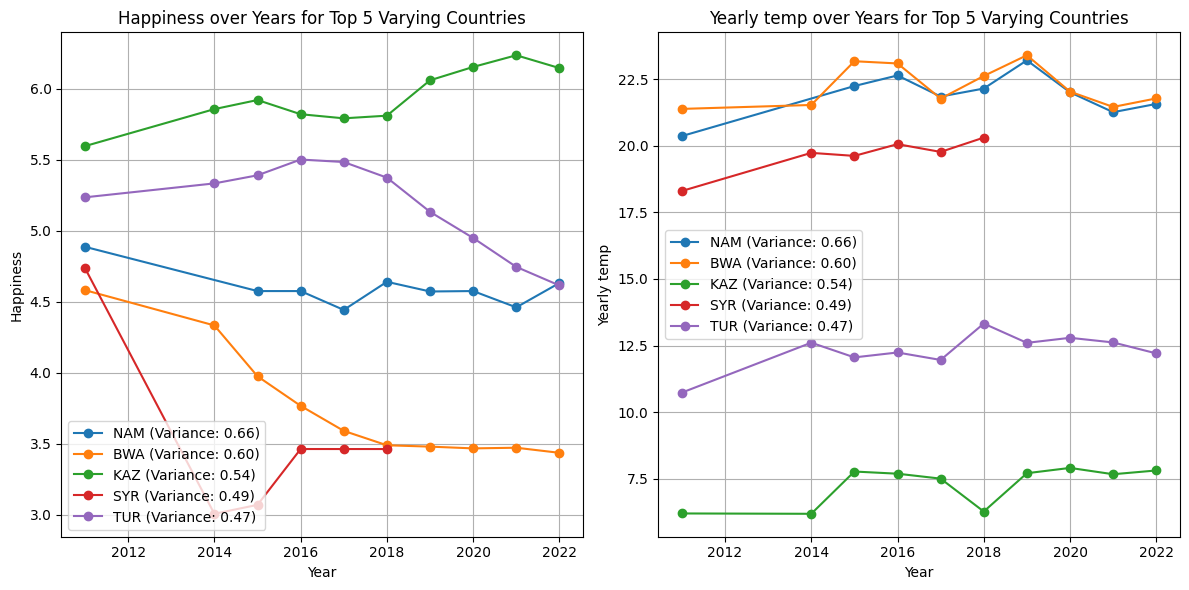

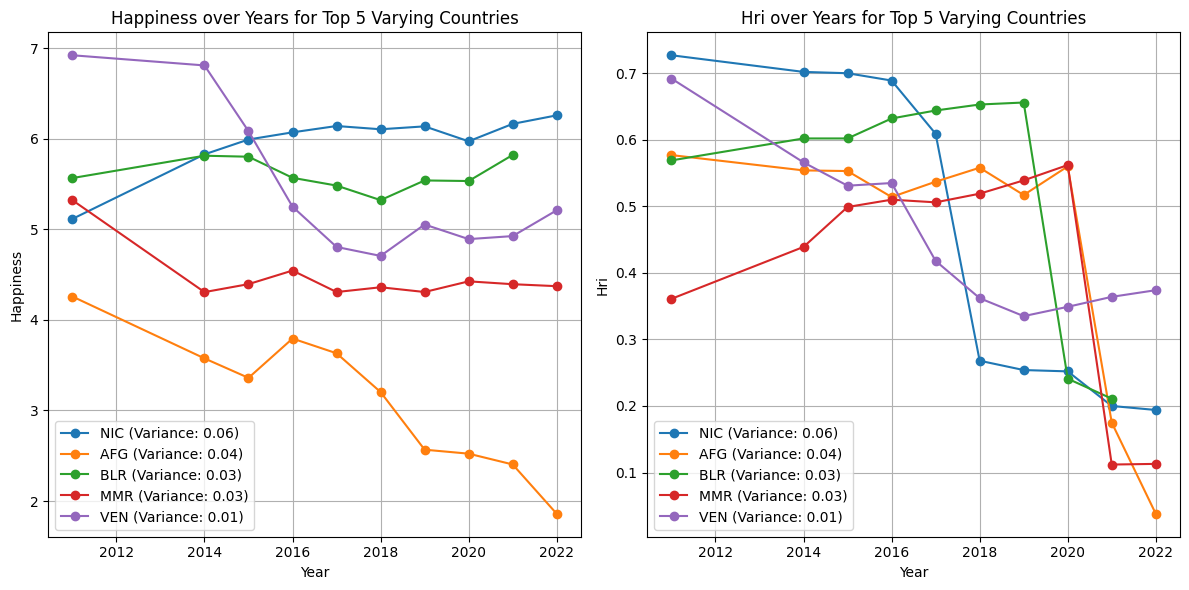

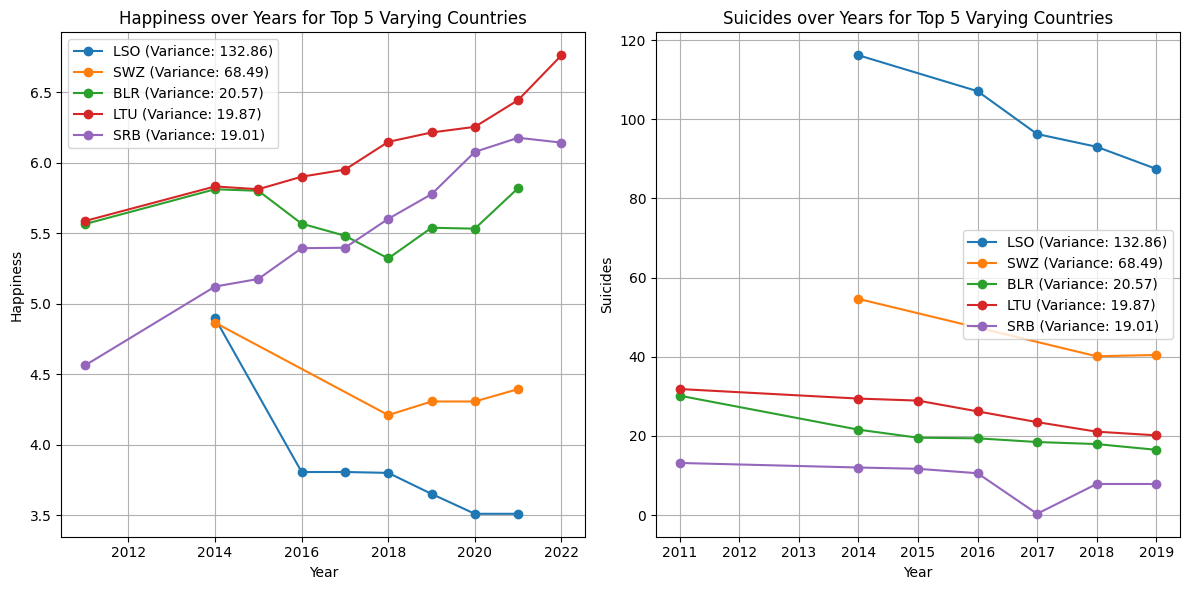

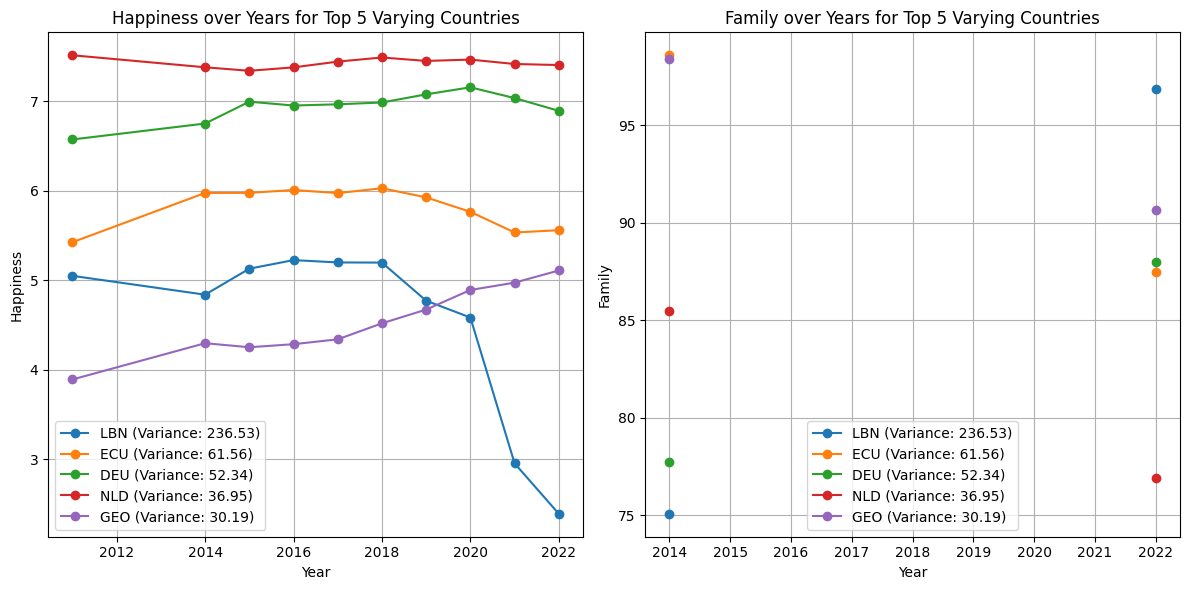

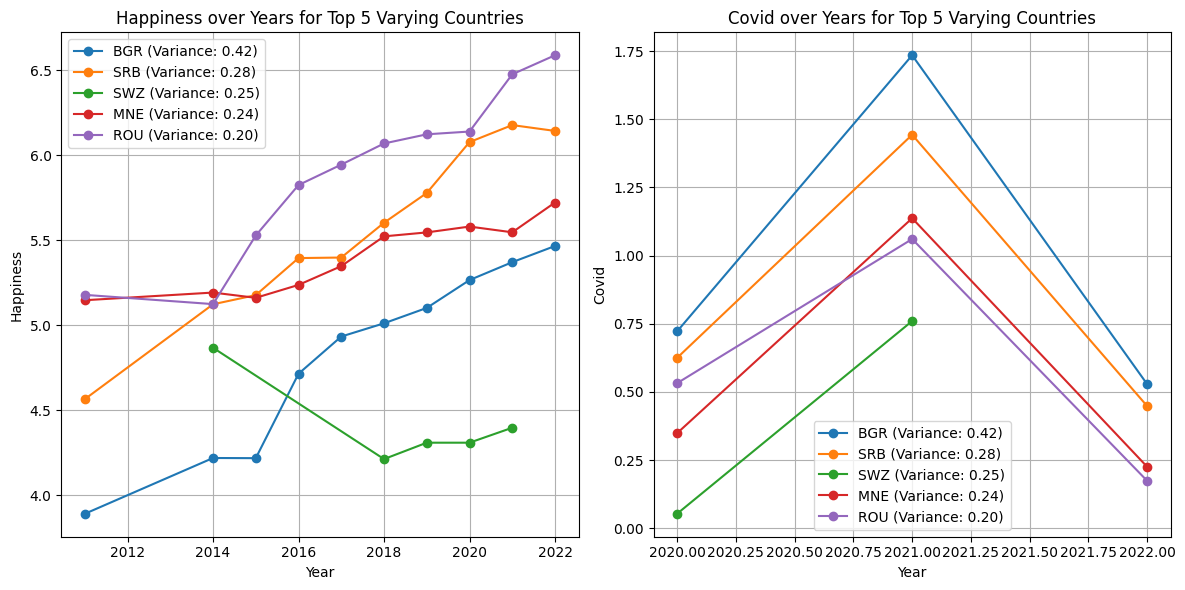

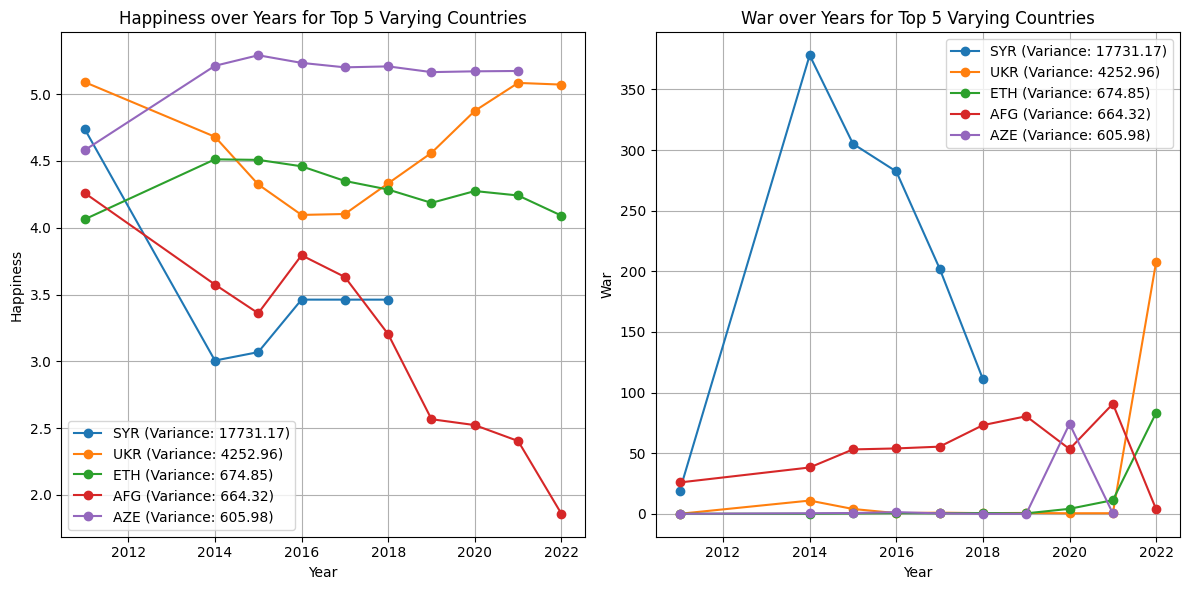

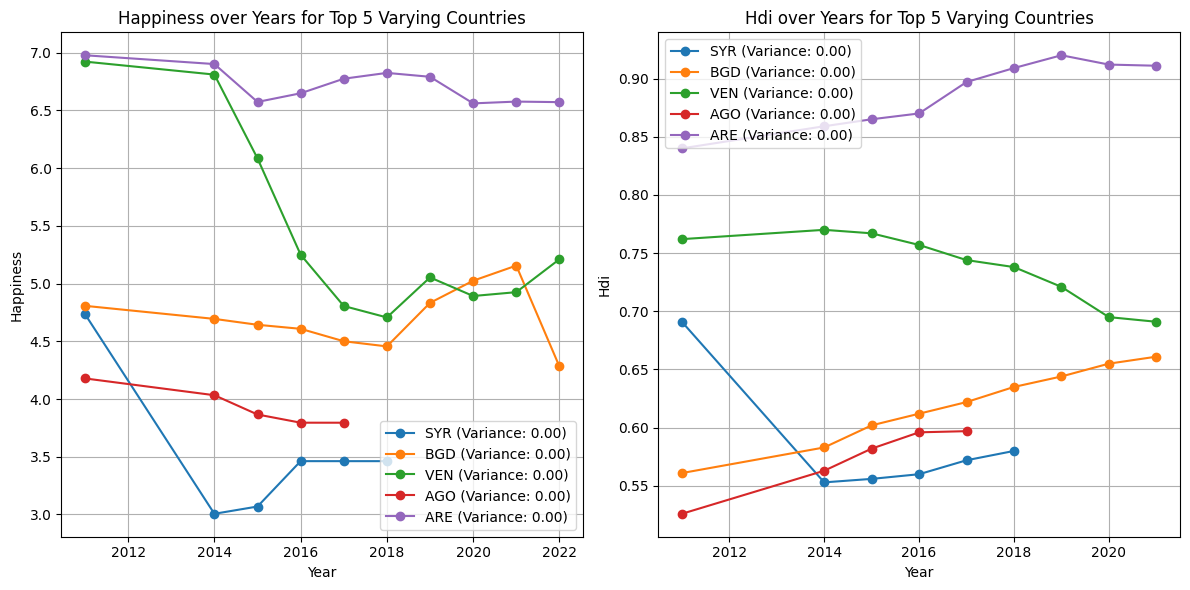

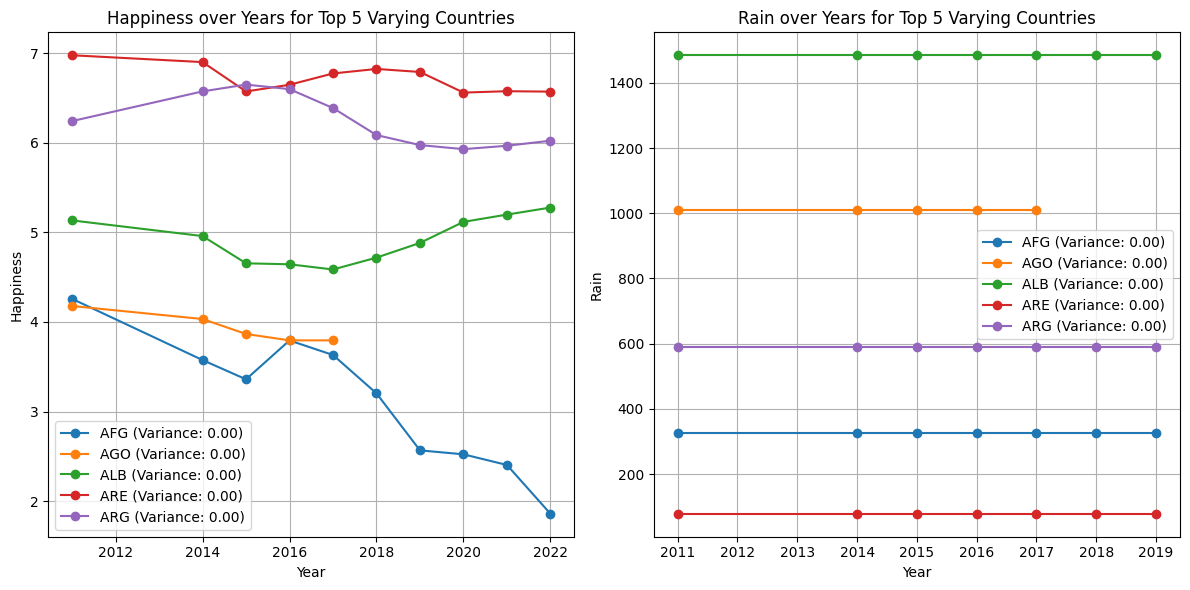

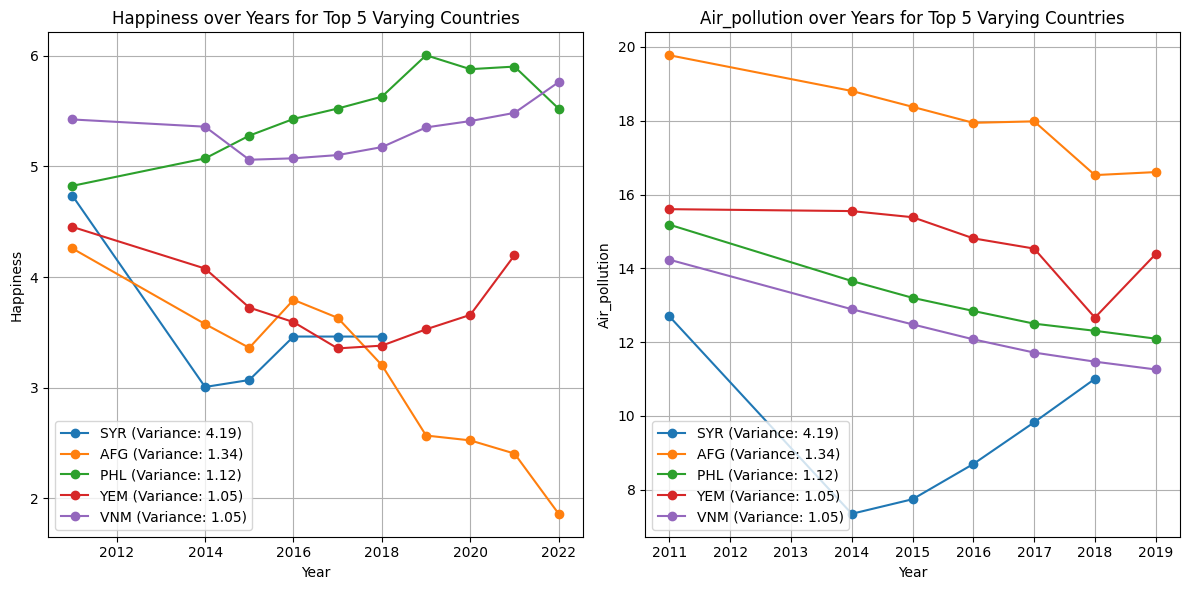

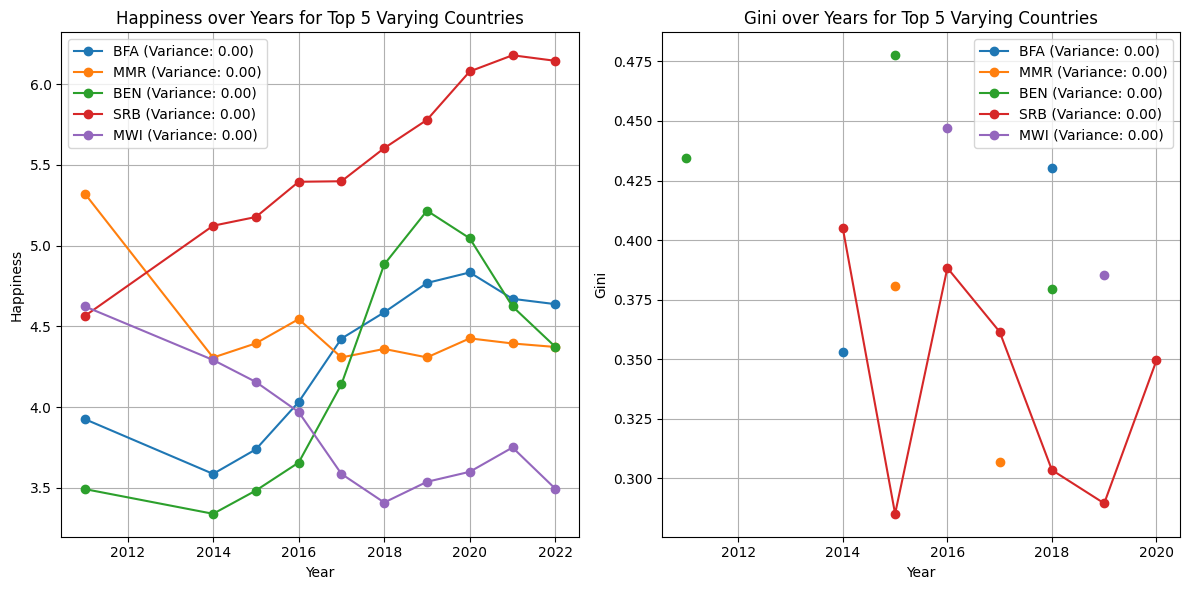

In [ ]:
def plot_happiness_and_feature_for_top_varying_countries(df, feature):
    """
    Given a DataFrame with 'country', 'year', 'happiness', and other features,
    this function finds the top five countries for which the specified feature varies the most
    over the years and plots two subplots:
    - 'happiness' for these countries over the years
    - The specified feature for these countries over the years

    :param df: pandas DataFrame with 'country', 'year', 'happiness', and other features
    :param feature: The name of the feature to analyze for variance
    """
    # Group by country
    grouped = df.groupby('code')

    # Calculate variance for the specified feature in each group
    variances = grouped[feature].var()

    # Get the top 5 countries with the highest variance
    top_varying_countries = variances.nlargest(5).index

    # Set up the plot with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Loop through the top 5 varying countries and plot their 'happiness' over the years in the first subplot
    for country in top_varying_countries:
        country_data = df[df['code'] == country]

        # Plot 'happiness' in the first subplot (left)
        axes[0].plot(
            country_data['year'],
            country_data['happiness'],
            marker='o',
            label=f"{country} (Variance: {variances[country]:.2f})"
        )

        # Plot the specified feature in the second subplot (right)
        axes[1].plot(
            country_data['year'],
            country_data[feature],
            marker='o',
            linestyle='-',
            label=f"{country} (Variance: {variances[country]:.2f})"
        )

    # Customize the first subplot (happiness)
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Happiness')
    axes[0].set_title('Happiness over Years for Top 5 Varying Countries')
    axes[0].grid(True)
    axes[0].legend()

    # Customize the second subplot (specified feature)
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel(feature.capitalize())
    axes[1].set_title(f'{feature.capitalize()} over Years for Top 5 Varying Countries')
    axes[1].grid(True)
    axes[1].legend()

    # Ensure subplots don't overlap
    plt.tight_layout()

    # Show the plot
    plt.show()


def plot_all_features_5max(df):
  features = list(df.columns )[3:]
  for f in features:
    plot_happiness_and_feature_for_top_varying_countries(df, f)
plot_all_features_5max(df)